In [1]:
!pip install keras_preprocessing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'Images'
TEST_DIR = 'Validation'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
TRAIN_DIR = 'Images'
TEST_DIR = 'Validation'

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        label_path = os.path.join(dir, label)
        if os.path.isdir(label_path):
            for imagename in os.listdir(label_path):
                image_paths.append(os.path.join(label_path,imagename))
                labels.append(label)
            print(label, "completed")
    return image_paths,labels

train = pd.DataFrame()
train['Image'], train['label'] = createdataframe(TRAIN_DIR)

In [6]:
print(train)

Empty DataFrame
Columns: [Image, label]
Index: []


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

In [8]:
print(test)
print(test['image'])

Empty DataFrame
Columns: [image, label]
Index: []
Series([], Name: image, dtype: float64)


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [11]:
if train.empty:
    print("Warning: The 'train' DataFrame is empty. Please populate it with image data.")
else:
    train_features = extract_features(train['image']) # Make sure to execute this cell to create train_features

In [12]:
test_features = extract_features(test['image'])

0it [00:00, ?it/s]

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from keras.models import model_from_json

In [21]:
json_file = open("emotiondetector.json", "r") # Change the file name
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5") # Make sure the weight file name matches too

In [22]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [23]:
image = 'Images/40.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)

label = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprise'}

pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 1s 502ms/step
model prediction is  Happy


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 79ms/step
model prediction is  Happy


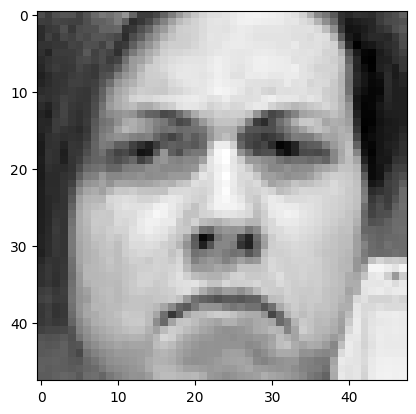

In [25]:
image = 'Images/40.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 65ms/step
model prediction is  Happy


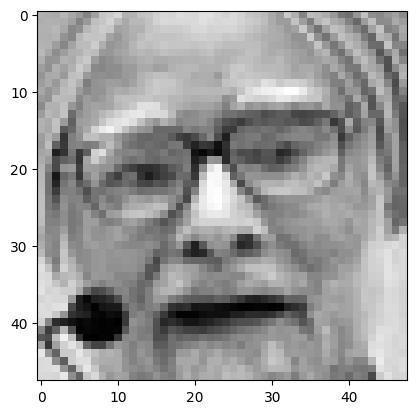

In [26]:
image = 'Images/1.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 88ms/step
model prediction is  Happy


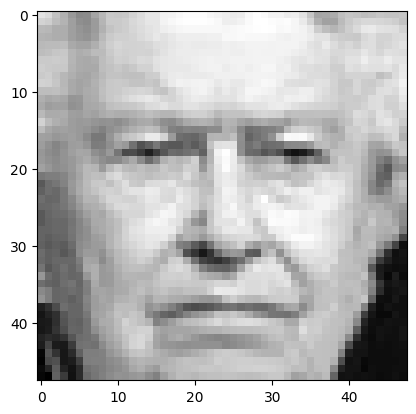

In [27]:
image = 'Images/77.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')